# Logistic regression exercise with Titanic data

## Introduction

- Data from Kaggle's Titanic competition: [data](https://github.com/justmarkham/DAT8/blob/master/data/titanic.csv), [data dictionary](https://www.kaggle.com/c/titanic/data)
- **Goal**: Predict survival based on passenger characteristics


## Step 1: Read the data into Pandas

In [24]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

In [25]:
#read the data csv file
df = pd.read_csv('./Datasets/titanic_train.csv')

In [26]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [28]:
#drop name , ticket,cabin
cols=['Name','Cabin','Ticket','PassengerId','Sex','Age','SibSp','Fare','Embarked']
df = df.drop(cols,axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 3 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Parch       891 non-null int64
dtypes: int64(3)
memory usage: 21.0 KB


In [29]:
df.head()

,Survived,Pclass,Parch
0,0,3,0
1,1,1,0
2,1,3,0
3,1,1,0
4,0,3,0


## Step 2: Create X and y

Define **Pclass** and **Parch** (number of Parents/Children Aboard) as the features, and **Survived** as the response.

In [30]:
X=df[['Pclass','Parch']].values
y=df['Survived'].values

## Step 3: Split the data into training and testing sets

In [31]:
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)

## Step 4: Fit a logistic regression model and examine the coefficients

Confirm that the coefficients make intuitive sense.

In [32]:
from sklearn.linear_model import LogisticRegression

In [33]:
model = LogisticRegression() 
model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [34]:
# examine the coefficients
print (model.coef_)

[[-0.80962184  0.18640986]]


## Step 5: Make predictions on the testing set and calculate the accuracy

In [35]:
y_pred = model.predict(X_test)

In [36]:
from sklearn.metrics import accuracy_score
print ('Accuracy:', accuracy_score(y_test, y_pred))

Accuracy: 0.705223880597


# ---- END ----

## Step 6:  Tune your model

In [37]:
logreg = LogisticRegression(C=10, penalty='l2')
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print ('Accuracy:', accuracy_score(y_test, y_pred))

Accuracy: 0.705223880597


In [38]:
# standardize X_train and X_test
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [39]:
# pipeline of StandardScaler and LogisticRegression
from sklearn.pipeline import make_pipeline
pipe = make_pipeline(StandardScaler(), LogisticRegression())

In [40]:
import numpy as np

# grid search for best combination of C and penalty
from sklearn.grid_search import GridSearchCV
C_range = 10.**np.arange(-2, 3)
penalty_options = ['l1', 'l2']
param_grid = dict(logisticregression__C=C_range, logisticregression__penalty=penalty_options)
grid = GridSearchCV(pipe, param_grid, cv=10, scoring='log_loss')
grid.fit(X, y)

GridSearchCV(cv=10, error_score='raise',
       estimator=Pipeline(steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('logisticregression', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))]),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'logisticregression__C': array([  1.00000e-02,   1.00000e-01,   1.00000e+00,   1.00000e+01,
         1.00000e+02]), 'logisticregression__penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, scoring='log_loss', verbose=0)

In [41]:
# print all log loss scores
grid.grid_scores_

[mean: -0.67125, std: 0.00578, params: {'logisticregression__C': 0.01, 'logisticregression__penalty': 'l1'},
 mean: -0.61784, std: 0.02560, params: {'logisticregression__C': 0.01, 'logisticregression__penalty': 'l2'},
 mean: -0.60848, std: 0.03824, params: {'logisticregression__C': 0.10000000000000001, 'logisticregression__penalty': 'l1'},
 mean: -0.60755, std: 0.04081, params: {'logisticregression__C': 0.10000000000000001, 'logisticregression__penalty': 'l2'},
 mean: -0.60752, std: 0.04338, params: {'logisticregression__C': 1.0, 'logisticregression__penalty': 'l1'},
 mean: -0.60751, std: 0.04363, params: {'logisticregression__C': 1.0, 'logisticregression__penalty': 'l2'},
 mean: -0.60753, std: 0.04392, params: {'logisticregression__C': 10.0, 'logisticregression__penalty': 'l1'},
 mean: -0.60753, std: 0.04394, params: {'logisticregression__C': 10.0, 'logisticregression__penalty': 'l2'},
 mean: -0.60754, std: 0.04397, params: {'logisticregression__C': 100.0, 'logisticregression__penalty

In [42]:
# examine the best model
print (grid.best_score_)
print (grid.best_params_)

-0.6075077941960053
{'logisticregression__C': 1.0, 'logisticregression__penalty': 'l2'}


## Step 7: Report your final Confusion matrix of Titanic predictions

In [43]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

In [44]:
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[147  21]
 [ 58  42]]


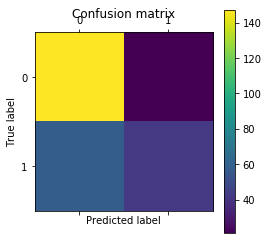

In [45]:
plt.matshow(confusion_matrix)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()